In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [3]:
# Load the dataset
df = pd.read_csv('OnlineRetail.csv')

# Display the first few rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Data Preprocessing
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add a new column for total price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


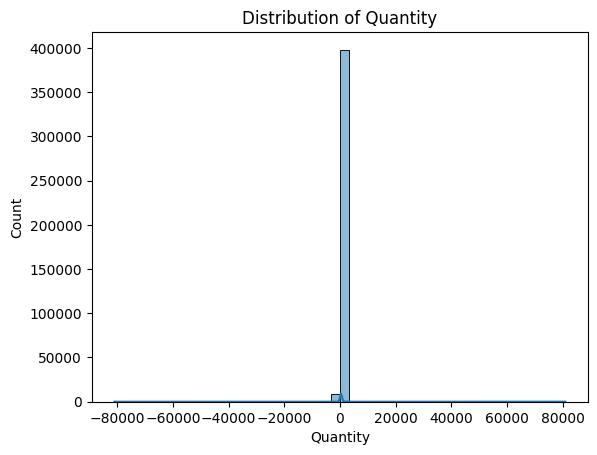

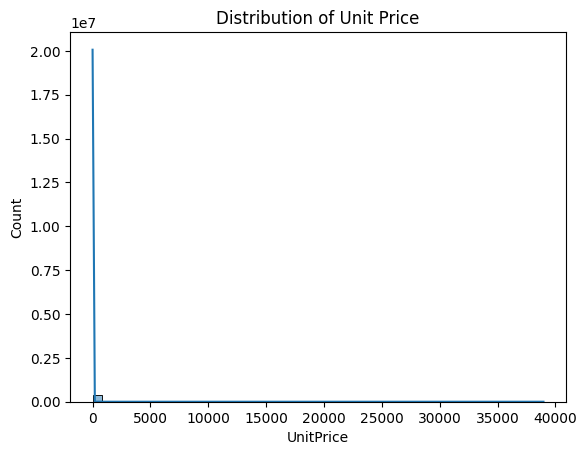

In [5]:
# Exploratory Data Analysis (EDA)
# Visualize the distribution of Quantity and UnitPrice
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.show()

sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Unit Price')
plt.show()

In [6]:
# Pivot Table: Total Sales by Country
pivot_country = pd.pivot_table(df, values='TotalPrice', index='Country', aggfunc='sum')
print("Total Sales by Country:")
print(pivot_country.sort_values(by='TotalPrice', ascending=False))

Total Sales by Country:
                       TotalPrice
Country                          
United Kingdom        6767873.394
Netherlands            284661.540
EIRE                   250285.220
Germany                221698.210
France                 196712.840
Australia              137077.270
Switzerland             55739.400
Spain                   54774.580
Belgium                 40910.960
Sweden                  36595.910
Japan                   35340.620
Norway                  35163.460
Portugal                29059.810
Finland                 22326.740
Channel Islands         20086.290
Denmark                 18768.140
Italy                   16890.510
Cyprus                  12946.290
Austria                 10154.320
Singapore                9120.390
Poland                   7213.140
Israel                   6994.250
Greece                   4710.520
Iceland                  4310.000
Canada                   3666.380
Unspecified              2667.070
Malta                   

In [7]:
# Pivot Table: Total Sales by Month
df['Month'] = df['InvoiceDate'].dt.month
pivot_month = pd.pivot_table(df, values='TotalPrice', index='Month', aggfunc='sum')
print("Total Sales by Month:")
print(pivot_month.sort_values(by='TotalPrice', ascending=False))

Total Sales by Month:
        TotalPrice
Month             
11     1132407.740
10      974603.590
9       931440.372
12      897110.400
5       648251.080
8       616368.000
6       608013.160
3       579964.610
7       574238.481
1       475074.380
2       436546.150
4       426047.851


In [8]:
# Most Popular Items Globally
popular_items_global = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print("Most Popular Items Globally:")
print(popular_items_global.head(10))

Most Popular Items Globally:
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64


In [9]:
# Most Popular Items by Country
popular_items_country = df.groupby(['Country', 'Description'])['Quantity'].sum().sort_values(ascending=False)
print("Most Popular Items by Country:")
print(popular_items_country.head(10))

Most Popular Items by Country:
Country         Description                       
United Kingdom  WORLD WAR 2 GLIDERS ASSTD DESIGNS     47982
                JUMBO BAG RED RETROSPOT               40880
                ASSORTED COLOUR BIRD ORNAMENT         32679
                WHITE HANGING HEART T-LIGHT HOLDER    32097
                POPCORN HOLDER                        28562
                PACK OF 12 LONDON TISSUES             24313
                BROCADE RING PURSE                    22708
                PACK OF 72 RETROSPOT CAKE CASES       22205
                VICTORIAN GLASS HANGING T-LIGHT       21456
                PACK OF 60 PINK PAISLEY CAKE CASES    19916
Name: Quantity, dtype: int64


In [10]:
# Most Popular Items by Month
popular_items_month = df.groupby(['Month', 'Description'])['Quantity'].sum().sort_values(ascending=False)
print("Most Popular Items by Month:")
print(popular_items_month.head(10))

Most Popular Items by Month:
Month  Description                      
11     ASSTD DESIGN 3D PAPER STICKERS       12551
       RABBIT NIGHT LIGHT                   12322
4      WORLD WAR 2 GLIDERS ASSTD DESIGNS    10128
10     WORLD WAR 2 GLIDERS ASSTD DESIGNS     8174
11     POPCORN HOLDER                        8157
5      SMALL POPCORN HOLDER                  6737
12     WORLD WAR 2 GLIDERS ASSTD DESIGNS     6502
8      ASSORTED COLOUR BIRD ORNAMENT         6424
10     RABBIT NIGHT LIGHT                    6245
11     PAPER CHAIN KIT 50'S CHRISTMAS        5879
Name: Quantity, dtype: int64


In [11]:
# Recommendation System
# Prepare data for Random Forest
df['CustomerID'] = df['CustomerID'].astype(int)
df['StockCode'] = df['StockCode'].astype(str)

In [14]:
# Create a user-item matrix
user_item_matrix = df.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', fill_value=0)

In [15]:
# Prepare X and y for the recommendation system
X = user_item_matrix.values  # Features (user-item matrix)
y = user_item_matrix.index   # Target (CustomerID)

In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3497, 3684)
X_test shape: (875, 3684)
y_train shape: (3497,)
y_test shape: (875,)


Random Forest 

In [17]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

In [20]:
# KNN Model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
knn_model = NearestNeighbors(n_neighbors=5, metric='cosine')
knn_model.fit(X_scaled)

NearestNeighbors(metric='cosine')

In [33]:
# Function to get recommendations using KNN
def get_recommendations(customer_id, n_recommendations=5):
    if customer_id in user_item_matrix.index:
        customer_index = user_item_matrix.index.get_loc(customer_id)
        distances, indices = knn_model.kneighbors([X_scaled[customer_index]], n_neighbors=n_recommendations+1)
        recommendations = user_item_matrix.iloc[indices[0][1:]].index
        return recommendations
    else:
        return "Customer ID not found in the dataset."

# Example: Get recommendations for a specific CustomerID
customer_id_example = y_train[0]  # Use the first customer in the training set as an example
print(f"Recommendations for CustomerID {customer_id_example}:")
print(get_recommendations(customer_id_example))

Recommendations for CustomerID 15820:
Index([13645, 16189, 14064, 16960, 14499], dtype='int32', name='CustomerID')


In [22]:
# Function to get recommendations using KNN
def get_recommendations(customer_id, n_recommendations=5):
    customer_index = user_item_matrix.index.get_loc(customer_id)
    distances, indices = knn_model.kneighbors([X_scaled[customer_index]], n_neighbors=n_recommendations+1)
    recommendations = user_item_matrix.iloc[indices[0][1:]].index
    return recommendations

# Example: Get recommendations for CustomerID 12345
print("Recommendations for CustomerID 12347:")
print(get_recommendations(12347))


Recommendations for CustomerID 12347:
Index([17901, 13079, 14027, 13508, 17694], dtype='int32', name='CustomerID')


In [30]:
# Function to get recommendations with product descriptions
def get_recommendations_with_descriptions(customer_id, n_recommendations=5):
    if customer_id in user_item_matrix.index:
        # Get the index of the customer in the user-item matrix
        customer_index = user_item_matrix.index.get_loc(customer_id)
        
        # Find the nearest neighbors using KNN
        distances, indices = knn_model.kneighbors([X_scaled[customer_index]], n_neighbors=n_recommendations + 1)
        
        # Get the recommended product codes
        recommended_product_codes = user_item_matrix.columns[indices[0][1:]]
        
        # Map the product codes to their descriptions
        recommended_products = df[df['StockCode'].isin(recommended_product_codes)][['StockCode', 'Description']].drop_duplicates()
        
        return recommended_products
    else:
        return "Customer ID not found in the dataset."

# Example: Get recommendations for a specific CustomerID
customer_id_example = y_train[0]  # Use the first customer in the training set as an example
print(f"Recommendations for CustomerID {customer_id_example}:")
recommendations = get_recommendations_with_descriptions(customer_id_example)
print(recommendations)

Recommendations for CustomerID 15820:
       StockCode                         Description
1310       22740                        POLKADOT PEN
2094       84352  SILVER CHRISTMAS TREE BAUBLE STAND
7019       22409           MONEY BOX BISCUITS DESIGN
9556       22069        BROWN  PIRATE TREASURE CHEST
181038    90036C  FLOWER GLASS GARLAND NECKL.36"BLUE


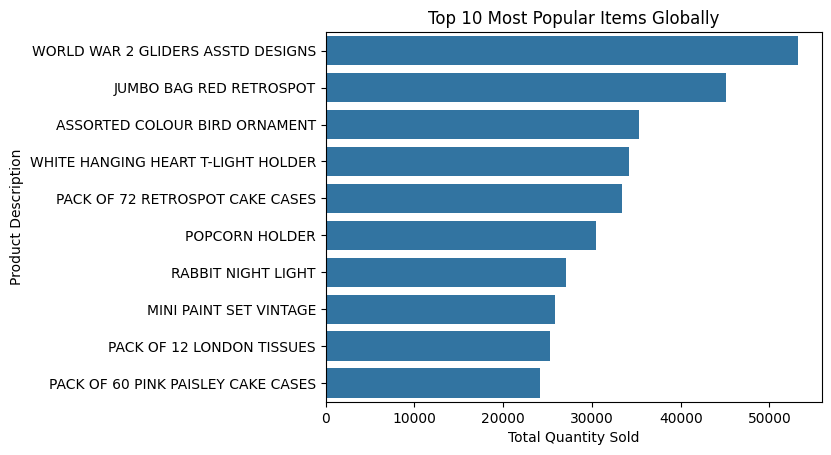

In [27]:
# Visualize Recommendations
# Plot the most popular items globally
sns.barplot(x=popular_items_global.head(10).values, y=popular_items_global.head(10).index)
plt.title('Top 10 Most Popular Items Globally')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

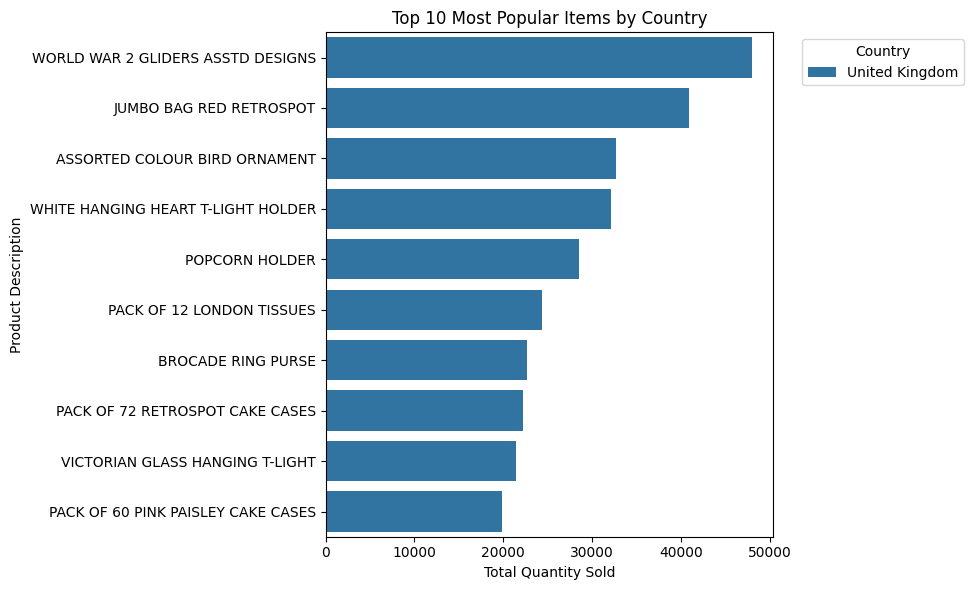

In [28]:
# Convert the MultiIndex Series to a DataFrame
popular_items_country_df = popular_items_country.reset_index()

# Rename columns for clarity
popular_items_country_df.columns = ['Country', 'Product Description', 'Total Quantity Sold']

# Sort by 'Total Quantity Sold' in descending order
popular_items_country_df = popular_items_country_df.sort_values(by='Total Quantity Sold', ascending=False)

# Get the top 10 most popular items by country
top_10_popular_items_country = popular_items_country_df.head(10)

# Plot the most popular items by country
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total Quantity Sold', 
    y='Product Description', 
    hue='Country', 
    data=top_10_popular_items_country
)
plt.title('Top 10 Most Popular Items by Country')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

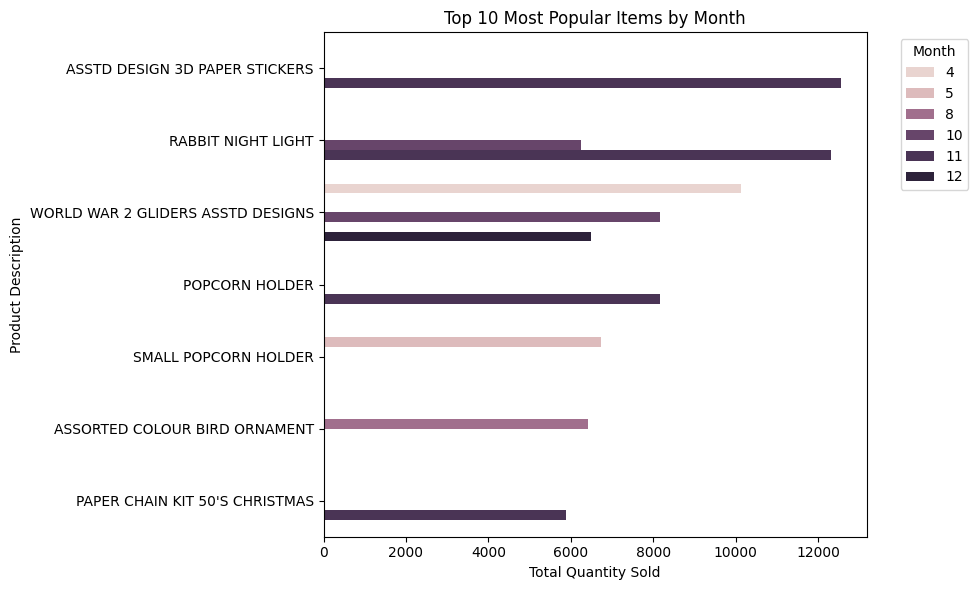

In [29]:
# Convert the MultiIndex Series to a DataFrame
popular_items_month_df = popular_items_month.reset_index()

# Rename columns for clarity
popular_items_month_df.columns = ['Month', 'Product Description', 'Total Quantity Sold']

# Sort by 'Total Quantity Sold' in descending order
popular_items_month_df = popular_items_month_df.sort_values(by='Total Quantity Sold', ascending=False)

# Get the top 10 most popular items by month
top_10_popular_items_month = popular_items_month_df.head(10)

# Plot the most popular items by month
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total Quantity Sold', 
    y='Product Description', 
    hue='Month', 
    data=top_10_popular_items_month
)
plt.title('Top 10 Most Popular Items by Month')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()